# Numerical Renormalization Group

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 60
limit = 5
h = 1
J = h/2
s_x = h/2*np.array([[0,1],
                [1,0]])
s_y = h/2*np.array([[0,-1j],
               [1j,0]])
s_z = h/2*np.array([[1,0],
                [0,-1]])

## Define Operators

In [3]:
s_x_operators = [None] * L
s_y_operators = [None] * L
s_z_operators = [None] * L
s_x_s_x_operators = [None] * L
s_z_s_z_operators = [None] * L

## Init Operators

In [4]:
for site_index in range(L):
    if site_index == 0:
        s_x_operators[site_index] = s_x
        s_y_operators[site_index] = s_y
        s_z_operators[site_index] = s_z
        s_x_s_x_operators[site_index] = np.dot(s_x,s_x)
        s_z_s_z_operators[site_index] = np.dot(s_z,s_z)
    else:
        s_x_operators[site_index] = np.eye(2)
        s_y_operators[site_index] = np.eye(2)
        s_z_operators[site_index] = np.eye(2)
        s_x_s_x_operators[site_index] = s_x
        s_z_s_z_operators[site_index] = s_z

## Adding Site

In [5]:
H = np.zeros((2,2),dtype=np.complex128)
for adding_site_index in range(1,L):
    # update Hamiltonian
    H = np.kron(H,np.eye(2))
    H += J*np.kron(s_x_operators[adding_site_index-1],s_x)
    H += J*np.kron(s_y_operators[adding_site_index-1],s_y)
    H += J*np.kron(s_z_operators[adding_site_index-1],s_z)
    # update Sx,Sy,Sz
    for i in range(L):
        if(i == adding_site_index):
            s_x_operators[i] = np.kron(s_x_operators[i],s_x)
            s_y_operators[i] = np.kron(s_y_operators[i],s_y)
            s_z_operators[i] = np.kron(s_z_operators[i],s_z)
            s_x_s_x_operators[i] = np.kron(s_x_s_x_operators[i],s_x)
            s_z_s_z_operators[i] = np.kron(s_z_s_z_operators[i],s_z)
        else:
            s_x_operators[i] = np.kron(s_x_operators[i],np.eye(2))
            s_y_operators[i] = np.kron(s_y_operators[i],np.eye(2))
            s_z_operators[i] = np.kron(s_z_operators[i],np.eye(2))
            s_x_s_x_operators[i] = np.kron(s_x_s_x_operators[i],np.eye(2))
            s_z_s_z_operators[i] = np.kron(s_z_s_z_operators[i],np.eye(2))
    # Truncation
    if(adding_site_index >= limit):
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        U = eigenvectors[:,:2**limit]
        H = U.conj().T @ H @ U
        for j in range(L):
            s_x_operators[j] = U.conj().T @ s_x_operators[j] @ U
            s_y_operators[j] = U.conj().T @ s_y_operators[j] @ U
            s_z_operators[j] = U.conj().T @ s_z_operators[j] @ U
            s_x_s_x_operators[j] = U.conj().T @ s_x_s_x_operators[j] @ U
            s_z_s_z_operators[j] = U.conj().T @ s_z_s_z_operators[j] @ U
        
    

## Calculate Correlation Functions And Averages

In [6]:
eigenvalues, eigenvectors = np.linalg.eigh(H)
ground_state_energy = eigenvalues[0]
ground_state_wave_function = eigenvectors[:,0]

In [7]:
ground_state_energy

-13.08893371543825

In [8]:
s_x_averages = np.zeros(L)
s_y_averages = np.zeros(L)
s_x_s_x_averages = np.zeros(L)
s_z_s_z_averages = np.zeros(L)

In [9]:
for k in range(L):
    s_x_averages[k] = (ground_state_wave_function.conj().T @ s_x_operators[k] @ ground_state_wave_function).real
    s_y_averages[k] = (ground_state_wave_function.conj().T @ s_y_operators[k] @ ground_state_wave_function).real
    s_x_s_x_averages[k] = (ground_state_wave_function.conj().T @ s_x_s_x_operators[k] @ ground_state_wave_function).real
    s_z_s_z_averages[k] = (ground_state_wave_function.conj().T @ s_z_s_z_operators[k] @ ground_state_wave_function).real

## Plot Result

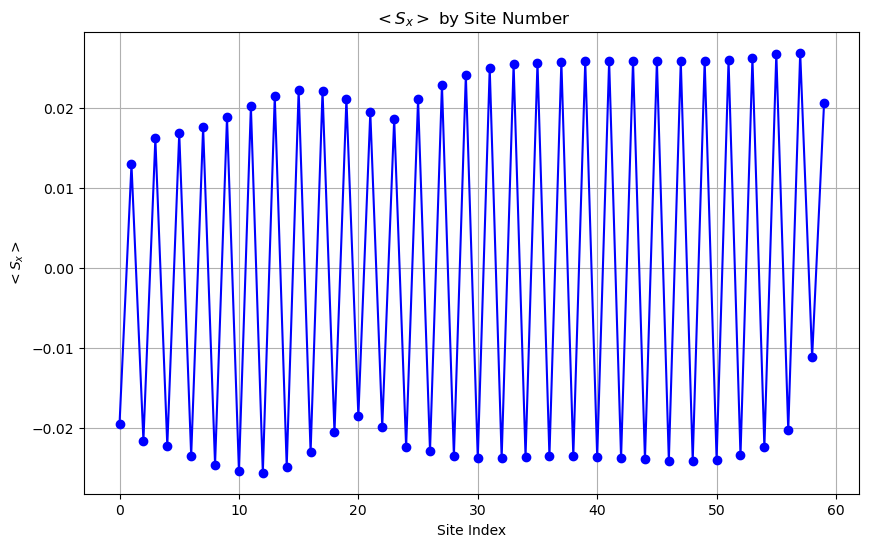

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,L,1), s_x_averages, 'bo-')
plt.xlabel('Site Index')
plt.ylabel('$<S_x>$')
plt.title('$<S_x>$ by Site Number')
plt.grid(True)
plt.show()

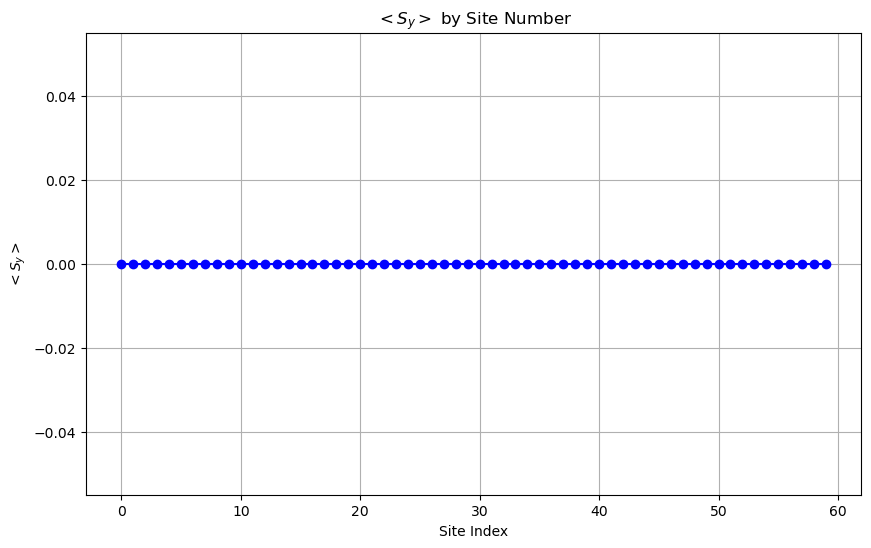

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,L,1), s_y_averages, 'bo-')
plt.xlabel('Site Index')
plt.ylabel('$<S_y>$')
plt.title('$<S_y>$ by Site Number')
plt.grid(True)
plt.show()

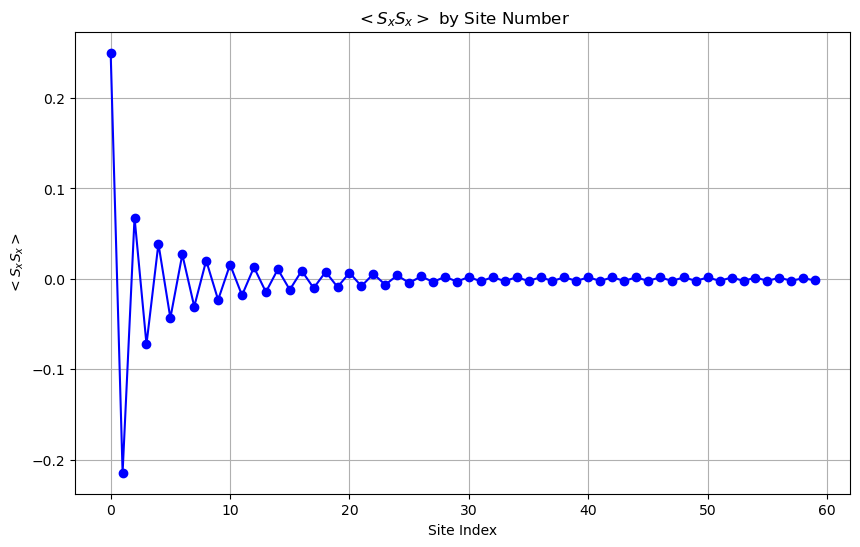

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,L,1), s_x_s_x_averages, 'bo-')
plt.xlabel('Site Index')
plt.ylabel('$<S_xS_x>$')
plt.title('$<S_xS_x>$ by Site Number')
plt.grid(True)
plt.show()

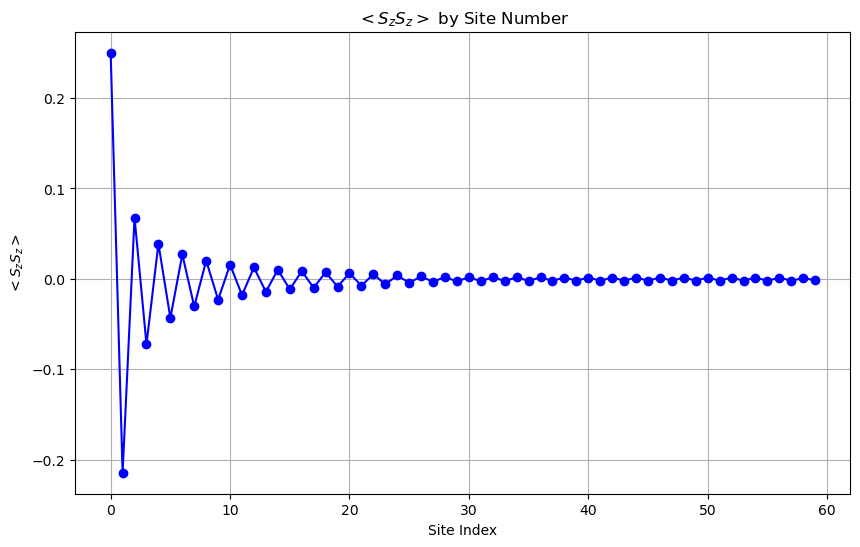

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,L,1), s_z_s_z_averages, 'bo-')
plt.xlabel('Site Index')
plt.ylabel('$<S_zS_z>$')
plt.title('$<S_zS_z>$ by Site Number')
plt.grid(True)
plt.show()